In [1]:
%cd ..

c:\Users\rahul\Projects\Altos-odyssey


c:\Users\rahul\Projects\Altos-odyssey\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import cv2
import os

img = cv2.imread(os.path.join("assets", "homescreen.png"))

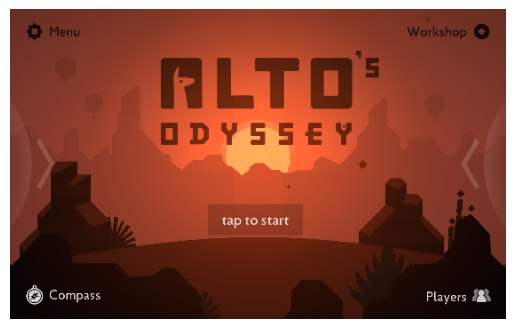

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.axis('off')
plt.imshow(cv2.cvtColor(cv2.resize(img, np.array(img.shape[:2][::-1])//4), cv2.COLOR_BGR2RGB))

In [4]:
import easyocr
reader = easyocr.Reader(['en'])
# result = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
# [i[1] for i in result]

In [6]:
# import numpy as np

# [(np.array(i[0]).sum(0), i[1]) for i in result]

In [23]:
import numpy as np
import easyocr

class TextNotFoundException(Exception): pass
def find_button_center(img2: np.ndarray, text: str, reader: easyocr.Reader, downscale=4):
    print(f"orig shape: {img2.shape}")
    img = cv2.resize(img2, np.array(img2.shape[:2][::-1])//downscale)
    print(f"shrunk shape: {img.shape}")
    result = reader.readtext(img)
    found_text = []
    for box, txt, cnf in result:
        if txt == text:
            return np.array(box).mean(0)*downscale
        found_text.append(txt)
    raise TextNotFoundException(f"Button with text '{text}' not found in given image. Text found in image: {found_text}")



In [24]:
find_button_center(img, "tap to start", reader, 4)

orig shape: (1399, 2239, 3)
shrunk shape: (349, 559, 3)


array([1108.,  964.])

API check

In [11]:
from src.alto_odyssey import utils
utils.find_button_center(img, "tap to start", utils.get_reader())

array([4432, 3856])

In [13]:
img.shape

(1399, 2239, 3)